# Weather Data Analysis - workbook

we are looking at snow and temperature data from 1961 to 2017. For this purpose, open source data from 10 weather cameras across Finland will be used, provided by the Finnish Institute of Meterolog will be used.

## Get modules and data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import os
import requests
import json
import numpy as np
import folium

In [2]:
os.chdir('c:/users/juan/desktop/weather_data') # PATH to weather data
locations = os.listdir()

In [3]:
# data source: Finnish Institute of Meterology database - https://ilmatieteenlaitos.fi/havaintojen-lataus#!/ 
# make dataframe of files
df = pd.DataFrame({'file':locations})
df

,file
0,weather_helsinki_kaisaniemi.csv
1,weather_jyväskylä_lentoasema.csv
2,weather_kajaani_lentoasema.csv
3,weather_Kouvola-Utti_lentoasema.csv
4,weather_kuopio_maaninka.csv
5,weather_lappeenranta_lentoasema.csv
6,weather_oulu_lentoasema.csv
7,weather_seinäjoki_pelmaa.csv
8,weather_sodankylä_tähtelä.csv
9,weather_turku_lentoasema.csv


## Get locations and generate map

In [4]:
# parse location from filename
def locator(string):
    a = string.split('_')[1]
    return a.title()

# get geocoding for each location
def geocoder(string2):
    url = 'https://nominatim.openstreetmap.org/search?q=' + string2 + '&limit=1&format=json'
    r = requests.get(url).json()
    lon = r[0]['lon']
    lat = r[0]['lat']
    print(string2, lon, lat)
    return np.array((lon, lat))

df['location'] = df['file'].apply(locator)
df['geocoder'] = df['location'].apply(geocoder)
df[['lon','lat']] = pd.DataFrame(df.geocoder.values.tolist(), index= df.index)
df

Helsinki 24.9425683 60.1674086
Jyväskylä 25.745951 62.2393002
Kajaani 27.7334227 64.2240872
Kouvola-Utti 26.9229413 60.8849815
Kuopio 27.594561484489 62.8241424
Lappeenranta 28.1875302 61.0582424
Oulu 25.4716809 65.0118734
Seinäjoki 22.8442015 62.7954104
Sodankylä 26.5902179 67.4189716
Turku 22.2670522 60.4517531


,file,location,geocoder,lon,lat
0,weather_helsinki_kaisaniemi.csv,Helsinki,"[24.9425683, 60.1674086]",24.9425683,60.1674086
1,weather_jyväskylä_lentoasema.csv,Jyväskylä,"[25.745951, 62.2393002]",25.745951,62.2393002
2,weather_kajaani_lentoasema.csv,Kajaani,"[27.7334227, 64.2240872]",27.7334227,64.2240872
3,weather_Kouvola-Utti_lentoasema.csv,Kouvola-Utti,"[26.9229413, 60.8849815]",26.9229413,60.8849815
4,weather_kuopio_maaninka.csv,Kuopio,"[27.594561484489, 62.8241424]",27.594561484489,62.8241424
5,weather_lappeenranta_lentoasema.csv,Lappeenranta,"[28.1875302, 61.0582424]",28.1875302,61.0582424
6,weather_oulu_lentoasema.csv,Oulu,"[25.4716809, 65.0118734]",25.4716809,65.0118734
7,weather_seinäjoki_pelmaa.csv,Seinäjoki,"[22.8442015, 62.7954104]",22.8442015,62.7954104
8,weather_sodankylä_tähtelä.csv,Sodankylä,"[26.5902179, 67.4189716]",26.5902179,67.4189716
9,weather_turku_lentoasema.csv,Turku,"[22.2670522, 60.4517531]",22.2670522,60.4517531


In [5]:
# create map - we will use a screen capture for the blog as it cannot be embedded.
m = folium.Map(location=[65.5236, 28.6750], zoom_start=5)
for i in df.index:
    folium.Marker([df.iloc[i]['lat'].astype(float), df.iloc[i]['lon'].astype(float)], popup=df.iloc[i]['location']).add_to(m)
m

In [175]:
# get leaflet html
'''
html_string = m.get_root().render()
Html_file= open("index.html","w")
Html_file.write(html_string)
Html_file.close()
'''

'\nhtml_string = m.get_root().render()\nHtml_file= open("index.html","w")\nHtml_file.write(html_string)\nHtml_file.close()\n'

## Creating DataFrame

In [6]:
# define first file anc test different aspects
path = df['file'][0]

In [7]:
station = pd.read_csv(path)

In [8]:
# translating cell names
station.columns = ['year', 'month', 'day', 'time', 'timezone', 'snow depth (cm)', 'avg_temp (C)', 'max_temp (C)', 'min_temp (C)']

In [9]:
print(station.tail())
print('')
print(station.head())

       year  month  day   time timezone  snow depth (cm)  avg_temp (C)  \
21180  2017     12   27  00:00      UTC             -1.0           4.0   
21181  2017     12   28  00:00      UTC             -1.0           2.7   
21182  2017     12   29  00:00      UTC             -1.0           3.8   
21183  2017     12   30  00:00      UTC             -1.0           2.7   
21184  2017     12   31  00:00      UTC             -1.0           1.7   

       max_temp (C)  min_temp (C)  
21180           4.9           0.4  
21181           4.2           1.8  
21182           4.1           2.7  
21183           3.8           1.1  
21184           3.1           1.0  

   year  month  day   time timezone  snow depth (cm)  avg_temp (C)  \
0  1960      1    1  00:00      UTC             29.0          -1.5   
1  1960      1    2  00:00      UTC             28.0           0.3   
2  1960      1    3  00:00      UTC             29.0           0.0   
3  1960      1    4  00:00      UTC             29.0      

In [10]:
# check if all values are UTC
print(station['timezone'].value_counts())
# create datetime column
station['dateitem']  = pd.to_datetime(station['year'].astype(str) + '-' + station['month'].astype(str) + '-' + station['day'].astype(str) + ' ' + station['time'].astype(str))
# set as index
station.set_index('dateitem', inplace=True)

UTC    21185
Name: timezone, dtype: int64


In [11]:
# checking nulls
print(station.count()) 
station.isnull().sum()

year               21185
month              21185
day                21185
time               21185
timezone           21185
snow depth (cm)    19756
avg_temp (C)       21185
max_temp (C)       21184
min_temp (C)       21183
dtype: int64


year                  0
month                 0
day                   0
time                  0
timezone              0
snow depth (cm)    1429
avg_temp (C)          0
max_temp (C)          1
min_temp (C)          2
dtype: int64

In [12]:
# checking nulls - seems some dates here and there
null_data = station[station.isnull().any(axis=1)]
null_data

,year,month,day,time,timezone,snow depth (cm),avg_temp (C),max_temp (C),min_temp (C)
dateitem,,,,,,,,,
1962-07-24,1962,7,24,00:00,UTC,-1.0,16.8,20.2,NaN
2007-06-02,2007,6,2,00:00,UTC,NaN,12.7,16.2,9.4
2007-06-03,2007,6,3,00:00,UTC,NaN,13.5,18.3,7.7
2007-06-04,2007,6,4,00:00,UTC,NaN,16.7,23.0,6.4
2007-06-05,2007,6,5,00:00,UTC,NaN,16.2,20.5,11.5
2007-06-06,2007,6,6,00:00,UTC,NaN,20.5,26.9,10.6
2007-06-07,2007,6,7,00:00,UTC,NaN,19.2,24.8,15.0
2007-06-08,2007,6,8,00:00,UTC,NaN,20.7,26.4,13.3
2007-06-09,2007,6,9,00:00,UTC,NaN,21.2,27.5,14.0


In [13]:
# store snow and temperature data in separate dataframes
snow_data = station['snow depth (cm)']
temp_data = station['avg_temp (C)']
min_temp_data = station['min_temp (C)']
max_temp_data = station['max_temp (C)']
var = df['location'][0]
# rename with location name
snow_data.rename(str(var), inplace=True)
temp_data.rename(str(var), inplace=True)
min_temp_data.rename(str(var), inplace=True)
max_temp_data.rename(str(var), inplace=True)

dateitem
1960-01-01     0.1
1960-01-02     1.3
1960-01-03     1.1
1960-01-04     0.1
1960-01-05     1.9
1960-01-06     0.6
1960-01-07     0.0
1960-01-08   -10.3
1960-01-09   -11.0
1960-01-10   -10.9
1960-01-11   -13.7
1960-01-12   -13.6
1960-01-13   -12.6
1960-01-14   -14.8
1960-01-15    -8.6
1960-01-16    -6.7
1960-01-17    -8.4
1960-01-18    -3.3
1960-01-19    -1.8
1960-01-20    -3.8
1960-01-21    -4.8
1960-01-22    -6.2
1960-01-23     0.4
1960-01-24     1.7
1960-01-25     1.3
1960-01-26     1.4
1960-01-27     1.3
1960-01-28    -5.0
1960-01-29   -14.5
1960-01-30   -15.4
              ... 
2017-12-02     4.5
2017-12-03     5.9
2017-12-04     5.7
2017-12-05     1.4
2017-12-06     0.4
2017-12-07     2.3
2017-12-08     6.0
2017-12-09     5.5
2017-12-10     3.4
2017-12-11     2.5
2017-12-12     4.6
2017-12-13     5.1
2017-12-14     4.1
2017-12-15     3.6
2017-12-16     3.4
2017-12-17     2.6
2017-12-18     3.6
2017-12-19     3.5
2017-12-20     3.7
2017-12-21     4.7
2017-12-22     1.1
201

## Transform to function

In [14]:
def transformer(path):
    '''Transform data frame
    
    INPUT - path of the file
    OUTPUT - transformed df, snow_data and temp_data
    '''
    station_new = pd.read_csv(path, engine='python')
    # translating cell names
    station_new.columns = ['year', 'month', 'day', 'time', 'timezone', 'snow depth (cm)', 'avg_temp (C)', 'max_temp (C)', 'min_temp (C)']
    # check if all values are UTC
    print('Checking timezone for', path)
    print(station_new['timezone'].value_counts())
    # create datetime column
    station_new['dateitem']  = pd.to_datetime(station_new['year'].astype(str) + '-' + station_new['month'].astype(str) + '-' + station_new['day'].astype(str) + ' ' + station_new['time'].astype(str))
    # set as index
    station_new.set_index('dateitem', inplace=True)
    # looking for nulls
    print('Checking count for', path)
    print(station_new.count()) 

    # store snow and temperature data in separate dataframes
    snow = station_new['snow depth (cm)']
    temp = station_new['avg_temp (C)']
    max_temp = station_new['max_temp (C)']
    min_temp = station_new['min_temp (C)']
    return station_new, snow, temp, min_temp, max_temp

In [15]:
count = 0
for file, name in zip(df['file'], df['location']):
    if count > 0:
        stat, snow, temp, min_temp, max_temp = transformer(file)                  
        # rename with location name
        snow.rename(str(name), inplace=True)
        temp.rename(str(name), inplace=True)
        min_temp.rename(str(name), inplace=True)
        max_temp.rename(str(name), inplace=True)
        snow_data = pd.concat([snow_data, snow], axis=1)
        temp_data = pd.concat([temp_data, temp], axis=1)
        min_temp_data = pd.concat([min_temp_data, min_temp], axis=1)
        max_temp_data = pd.concat([max_temp_data, max_temp], axis=1)
    else:
        pass
    count += 1
    print(count)

1
Checking timezone for weather_jyväskylä_lentoasema.csv
UTC    21184
Name: timezone, dtype: int64
Checking count for weather_jyväskylä_lentoasema.csv
year               21184
month              21184
day                21184
time               21184
timezone           21184
snow depth (cm)    20861
avg_temp (C)       21178
max_temp (C)       21181
min_temp (C)       21180
dtype: int64
2
Checking timezone for weather_kajaani_lentoasema.csv
UTC    21183
Name: timezone, dtype: int64
Checking count for weather_kajaani_lentoasema.csv
year               21183
month              21183
day                21183
time               21183
timezone           21183
snow depth (cm)    14817
avg_temp (C)       21179
max_temp (C)       21172
min_temp (C)       21174
dtype: int64
3
Checking timezone for weather_Kouvola-Utti_lentoasema.csv
UTC    21184
Name: timezone, dtype: int64
Checking count for weather_Kouvola-Utti_lentoasema.csv
year               21184
month              21184
day                

# Missing Data

In [186]:
snow_data.head()

,Helsinki,Jyväskylä,Kajaani,Kouvola-Utti,Kuopio,Lappeenranta,Oulu,Seinäjoki,Sodankylä,Turku
dateitem,,,,,,,,,,
1960-01-01,29.0,30.0,38.0,38.0,25.0,28.0,14.0,12.0,37.0,20.0
1960-01-02,28.0,34.0,43.0,38.0,31.0,28.0,27.0,15.0,39.0,20.0
1960-01-03,29.0,37.0,43.0,38.0,34.0,28.0,27.0,13.0,40.0,22.0
1960-01-04,29.0,36.0,43.0,38.0,34.0,28.0,27.0,12.0,40.0,20.0
1960-01-05,29.0,36.0,43.0,38.0,34.0,25.0,28.0,10.0,39.0,17.0


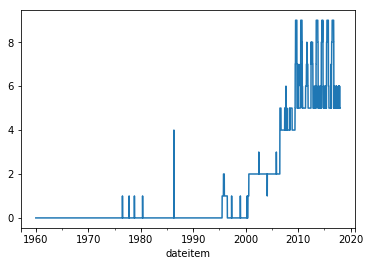

In [187]:
# check if nulls
isnusnow = snow_data.isnull()
isnusnow.sum(axis=1).plot()

In [16]:
temp_data.head()

,Helsinki,Jyväskylä,Kajaani,Kouvola-Utti,Kuopio,Lappeenranta,Oulu,Seinäjoki,Sodankylä,Turku
dateitem,,,,,,,,,,
1960-01-01,-1.5,-7.9,-11.5,-5.7,-7.8,-8.0,-9.3,-2.2,-9.7,-1.9
1960-01-02,0.3,-1.9,-2.2,-1.8,-2.2,-2.3,-0.8,0.3,-4.1,-0.2
1960-01-03,0.0,-0.6,-1.7,-1.7,-1.2,-1.8,-0.9,0.4,-7.0,-0.7
1960-01-04,-0.2,-1.5,-1.8,-2.1,-1.8,-2.7,0.2,0.1,-9.2,-1.7
1960-01-05,0.4,-1.1,-1.6,-1.2,-0.8,-1.5,-0.4,0.5,-2.4,0.8


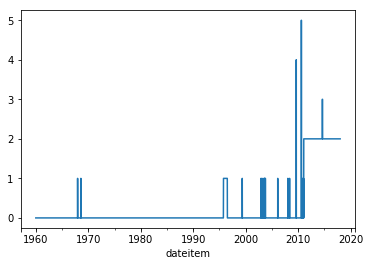

In [17]:
# check if nulls
isnutemp = temp_data.isnull()
isnutemp.sum(axis=1).plot()

It seems that with time some stations have become defunct. The solution is to limit the range of time to the year 2000, which is unfortunate, but is required for accuracy. Then we backfill and forwardfill a small part of the data to account for publich holidays on which no data is recorded. Finally, the remaining nulls are dropped compeletely. 

In [18]:
# limit the date range
snow_data = snow_data.loc[snow_data.index <'2000-12-31']
temp_data = temp_data.loc[temp_data.index <'2000-12-31']

In [19]:
# backfill singular missing values, but only if only two consecutive values are missing
snow_data = snow_data.fillna(method="backfill", limit=2)
snow_data = snow_data.fillna(method="ffill", limit=2)
temp_data = temp_data.fillna(method="backfill", limit=2)
temp_data = temp_data.fillna(method="ffill", limit=2)

In [20]:
# for the remaining values, we take out the rows entirely:
snow_data = snow_data.dropna(how='any', axis=0)
temp_data = temp_data.dropna(how='any', axis=0)

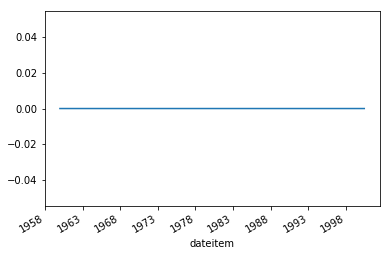

In [21]:
# check if more nulls
isnusnow = snow_data.isnull()
isnusnow.sum(axis=1).plot()

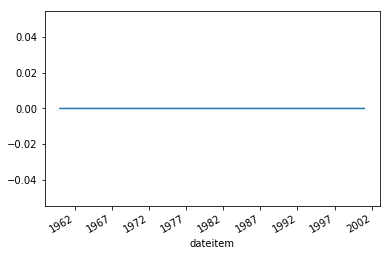

In [22]:
# check if more nulls
isnutemp = temp_data.isnull()
isnutemp.sum(axis=1).plot()

## Analysis
snow depth variable

In [23]:
# group snow data by year
snow_data['Year'] = snow_data.index.map(lambda x: x.year) # using this solution https://stackoverflow.com/questions/25146121/extracting-just-month-and-year-from-pandas-datetime-column-python 
group_snow = snow_data.groupby(by='Year').mean()
group_snow

,Helsinki,Jyväskylä,Kajaani,Kouvola-Utti,Kuopio,Lappeenranta,Oulu,Seinäjoki,Sodankylä,Turku
Year,,,,,,,,,,
1960,17.013661,14.240437,21.183060,20.841530,14.551913,13.972678,11.666667,4.887978,22.155738,10.068306
1961,0.947945,13.427397,21.117808,16.613699,12.430137,9.531507,12.816438,5.271233,26.887671,2.189041
1962,5.528767,17.660274,20.709589,25.632877,12.172603,10.512329,12.786301,7.134247,25.120548,7.126027
1963,6.835616,10.575342,19.931507,16.786301,11.819178,11.484932,9.375342,9.953425,22.597260,8.421918
1964,1.199454,11.792350,19.035519,8.549180,11.704918,7.808743,4.199454,3.237705,27.010929,4.642077
1965,7.189041,15.846575,17.558904,22.832877,16.408219,20.515068,12.147945,8.942466,28.709589,6.665753
1966,19.490411,22.709589,18.041096,27.660274,17.613699,22.783562,12.410959,14.657534,25.819178,20.693151
1967,11.249315,15.627397,14.002740,15.123288,11.276712,11.227397,8.821918,6.145205,28.534247,12.295890
1968,9.224044,14.620219,17.508197,11.773224,4.426230,10.030055,15.614754,8.896175,28.043716,7.087432


0 0
0 1
0 2
0 3
0 4
1 0
1 1
1 2
1 3
1 4


Text(0.5,0.98,'Average snow depth evolution - 1960-2000 (cm)')

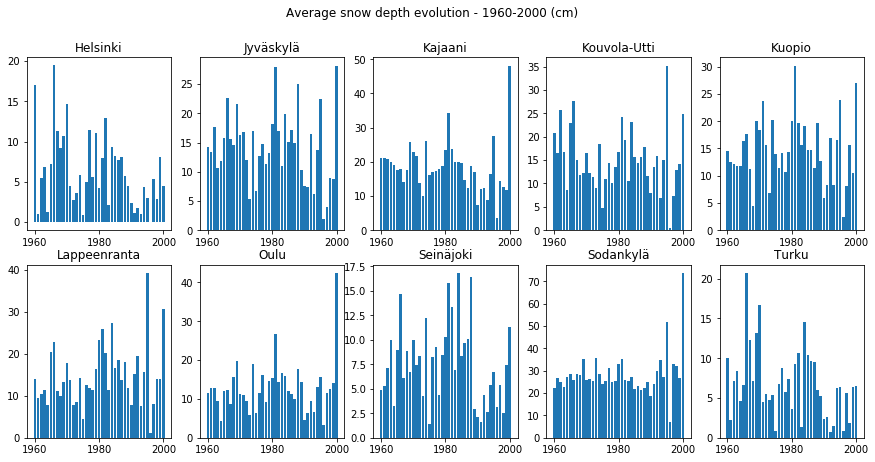

In [24]:
# create graphic for snow depth evolution
rows = 2
cols = 5
cycle = 0
f, arr = plt.subplots(nrows=rows, ncols=cols, figsize=(15, 7))
for row in range(rows):
    for col in range(cols):
        print(row, col)
        var = group_snow.columns[cycle]
        arr[row, col].bar(group_snow.index, group_snow[var])
        arr[row, col].set_title(var)
        cycle += 1
f.suptitle('Average snow depth evolution - 1960-2000 (cm)')

In [25]:
# Create a dataframe for differences in snow, drop first entry.
snow_data_evo = snow_data.diff()[1:]

In [26]:
# Get a max for snowing
print(snow_data_evo.max())
print(snow_data_evo['Turku'].nlargest(5))

Helsinki        30.0
Jyväskylä       21.0
Kajaani         17.0
Kouvola-Utti    25.0
Kuopio          22.0
Lappeenranta    27.0
Oulu            22.0
Seinäjoki       20.0
Sodankylä       29.0
Turku           45.0
Year             1.0
dtype: float64
dateitem
1989-11-22    45.0
1960-12-09    27.0
1980-10-26    27.0
1991-11-19    26.0
1964-01-27    25.0
Name: Turku, dtype: float64


Text(0.5,1,'Helsinki Weather Station - snowing vs. melting (cm)')

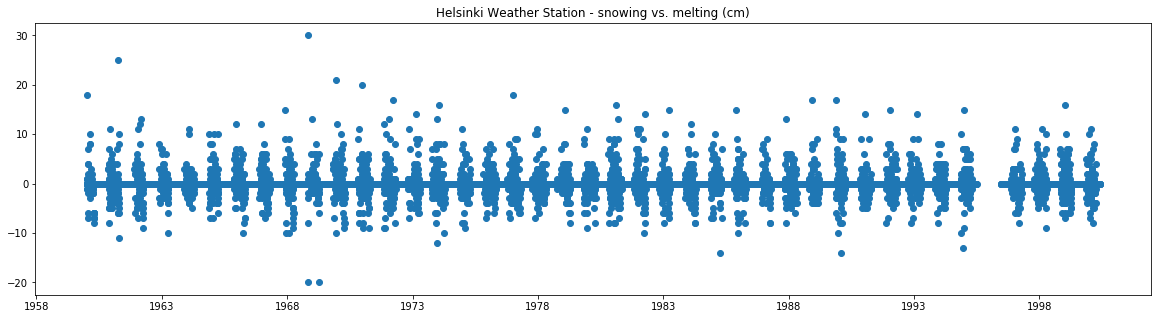

In [27]:
# generate plot for one weather station - snowing vs. melting
plt.figure(figsize=(20,5))
plt.scatter(x=snow_data_evo.index, y=snow_data_evo['Helsinki'])
plt.title('Helsinki Weather Station - snowing vs. melting (cm)')

In [28]:
# Group temperature dataset by year
temp_data['Year'] = temp_data.index.map(lambda x: x.year) # using this solution https://stackoverflow.com/questions/25146121/extracting-just-month-and-year-from-pandas-datetime-column-python 
group_temp = temp_data.groupby(by='Year').mean()
group_temp

,Helsinki,Jyväskylä,Kajaani,Kouvola-Utti,Kuopio,Lappeenranta,Oulu,Seinäjoki,Sodankylä,Turku
Year,,,,,,,,,,
1960,5.243169,2.820765,2.001093,3.759016,2.851913,3.595355,2.512022,3.633880,-0.439344,4.590984
1961,6.975890,4.269589,3.076164,5.422192,4.199726,5.164658,3.567123,4.969589,0.992877,6.083562
1962,4.704932,2.228219,1.010685,3.324932,2.153699,3.290411,1.475068,2.563288,-1.642192,4.058082
1963,4.941918,2.462740,1.246849,3.449315,2.164658,3.081096,2.052877,3.128493,-0.820548,4.341918
1964,5.520219,2.824863,1.742623,3.998634,2.646175,3.668852,2.768852,3.660656,-0.150820,4.788798
1965,4.929041,2.315616,0.989315,3.298356,2.032055,3.169041,1.428219,2.733973,-1.572329,4.241644
1966,4.212055,1.275342,-0.350685,2.494795,0.708493,2.219178,0.430959,1.543288,-2.823562,3.787397
1967,5.586301,3.121096,2.058356,4.175890,2.887397,4.082466,2.595342,3.520000,-0.262740,4.951507
1968,4.777869,1.899180,0.453825,2.983607,1.445082,2.878415,0.954645,2.325137,-2.225137,4.300546


0 0
0 1
0 2
0 3
0 4
1 0
1 1
1 2
1 3
1 4


Text(0.5,0.98,'Average temperature evolution - 1960-2000 (°C)')

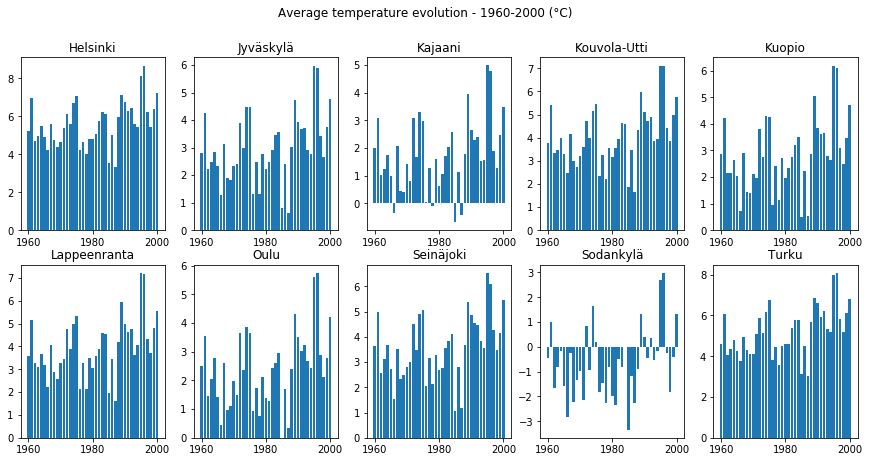

In [29]:
# Generate graph for temp evolution
rows = 2
cols = 5
cycle = 0
f, arr = plt.subplots(nrows=rows, ncols=cols, figsize=(15, 7))
for row in range(rows):
    for col in range(cols):
        print(row, col)
        var = group_snow.columns[cycle]
        arr[row, col].bar(group_temp.index, group_temp[var])
        arr[row, col].set_title(var)
        # arr[row, col].set_xlim([1961, 2014]) # fixing outliers
        cycle += 1
f.suptitle('Average temperature evolution - 1960-2000 (°C)')

In [30]:
# Calculate min and max
print('hottest average temperature was,', max_temp_data.max(), max_temp_data.idxmax())
print('lowest average temperature was,', min_temp_data.min(), min_temp_data.idxmin())

hottest average temperature was, Helsinki        31.2
Jyväskylä       34.2
Kajaani         34.5
Kouvola-Utti    34.1
Kuopio          35.0
Lappeenranta    34.6
Oulu            33.0
Seinäjoki       33.6
Sodankylä       31.3
Turku           32.1
dtype: float64 Helsinki       1975-08-08
Jyväskylä      2010-07-29
Kajaani        2010-07-29
Kouvola-Utti   2010-07-28
Kuopio         2010-07-29
Lappeenranta   2010-07-28
Oulu           2010-07-29
Seinäjoki      2010-07-29
Sodankylä      1970-07-20
Turku          2010-07-13
dtype: datetime64[ns]
lowest average temperature was, Helsinki       -34.3
Jyväskylä      -38.5
Kajaani        -42.8
Kouvola-Utti   -37.3
Kuopio         -41.2
Lappeenranta   -36.8
Oulu           -41.5
Seinäjoki      -43.6
Sodankylä      -49.5
Turku          -35.2
dtype: float64 Helsinki       1987-01-10
Jyväskylä      1966-02-03
Kajaani        1966-02-09
Kouvola-Utti   1987-01-09
Kuopio         1966-02-03
Lappeenranta   1987-01-10
Oulu           1966-02-03
Seinäjoki      1966-0

In [31]:
# calculate correlation with year
snow_data.corr()['Year']

Helsinki       -0.108745
Jyväskylä      -0.054775
Kajaani        -0.063799
Kouvola-Utti   -0.052763
Kuopio         -0.009698
Lappeenranta    0.045564
Oulu            0.029323
Seinäjoki      -0.038697
Sodankylä       0.038041
Turku          -0.100028
Year            1.000000
Name: Year, dtype: float64

In [32]:
# calculate correlation with year
temp_data.corr()['Year']

Helsinki        0.046063
Jyväskylä       0.037630
Kajaani         0.032285
Kouvola-Utti    0.041928
Kuopio          0.040758
Lappeenranta    0.045020
Oulu            0.038693
Seinäjoki       0.043906
Sodankylä       0.028941
Turku           0.057384
Year            1.000000
Name: Year, dtype: float64

Extreme events

In [40]:
group_temp_std = temp_data.groupby(by='Year').std()

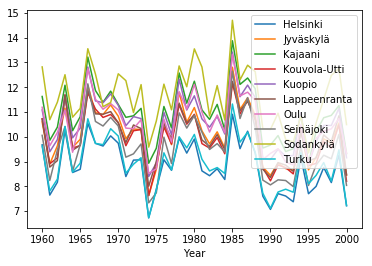

In [51]:
group_temp_std.plot()

In [71]:
# Check correlation on the yearly standard deviation
group_temp_std['Year'] = group_temp_std.index
for column in group_temp_std.columns:
    correlate = group_temp_std[[column, 'Year']].corr()
    print(column, correlate['Year'].iloc[0])

Helsinki -0.3390406435227884
Jyväskylä -0.2731306201420316
Kajaani -0.26154102630910453
Kouvola-Utti -0.3095573330931601
Kuopio -0.23070852073110584
Lappeenranta -0.25860592544091227
Oulu -0.24475984600194411
Seinäjoki -0.2466510496334953
Sodankylä -0.20942453499669855
Turku -0.29595571502395923
Year Year    1.0
Year    1.0
Name: Year, dtype: float64


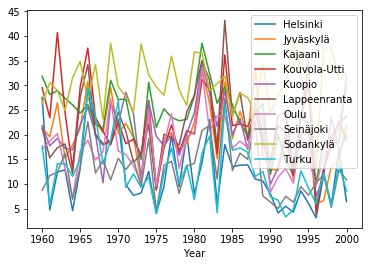

In [72]:
group_snow_std = snow_data.groupby(by='Year').std()
group_snow_std.plot()

In [73]:
# Check correlation on the yearly standard deviation
group_snow_std['Year'] = group_snow_std.index
for column in group_snow_std.columns:
    correlate = group_snow_std[[column, 'Year']].corr()
    print(column, correlate['Year'].iloc[0])

Helsinki -0.3955233422805996
Jyväskylä -0.31878183354729633
Kajaani -0.4259485223290377
Kouvola-Utti -0.3222203526624504
Kuopio -0.1612457895214086
Lappeenranta 0.06967568373096869
Oulu 0.08143957375069603
Seinäjoki -0.20589808669255077
Sodankylä 0.07212429148003223
Turku -0.3678507528594512
Year Year    1.0
Year    1.0
Name: Year, dtype: float64
